In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [109]:
datos = pd.read_csv('Salida_Datos_Abiertos.csv', encoding="ISO-8859-1")
datos.drop(['Departamento', 'Ciudad_municipio', 'unidad_medida', 'Pais_viajo_1_cod', 'Tipo_recuperacion', 'per_etn_', 'nom_grupo_'],axis=1,inplace=True)
datos.columns=datos.columns.str.replace(' ', '_')
datos.to_csv('datos.csv', index=False)

/home/santiago/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [110]:
datos.head(2)

,fecha_hoy_casos,Caso,Fecha_Not,Departamento_nom,Ciudad_municipio_nom,Edad,Sexo,Fuente_tipo_contagio,Ubicacion,Estado,Pais_viajo_1_nom,Recuperado,Fecha_inicio_sintomas,Fecha_muerte,Fecha_diagnostico,Fecha_recuperado
0,2021-03-04 00:00:00,2265685,2021-03-02 00:00:00,BOGOTA,BOGOTA,49,M,Comunitaria,Casa,Leve,NaN,Recuperado,2021-02-25 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00
1,2021-03-04 00:00:00,2265686,2021-03-02 00:00:00,BOGOTA,BOGOTA,49,M,Relacionado,Casa,Leve,NaN,Recuperado,2021-02-23 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00


In [111]:
datos_ini = pd.read_csv("datos.csv", parse_dates=["fecha_hoy_casos"], dayfirst=True)
datos_ini.dtypes

/home/santiago/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


fecha_hoy_casos          datetime64[ns]
Caso                              int64
Fecha_Not                        object
Departamento_nom                 object
Ciudad_municipio_nom             object
Edad                              int64
Sexo                             object
Fuente_tipo_contagio             object
Ubicacion                        object
Estado                           object
Pais_viajo_1_nom                 object
Recuperado                       object
Fecha_inicio_sintomas            object
Fecha_muerte                     object
Fecha_diagnostico                object
Fecha_recuperado                 object
dtype: object

In [112]:
datos_full = pd.read_csv("datos.csv", parse_dates=["Fecha_Not"], dayfirst=True)
datos_full.dtypes

fecha_hoy_casos                  object
Caso                              int64
Fecha_Not                datetime64[ns]
Departamento_nom                 object
Ciudad_municipio_nom             object
Edad                              int64
Sexo                             object
Fuente_tipo_contagio             object
Ubicacion                        object
Estado                           object
Pais_viajo_1_nom                 object
Recuperado                       object
Fecha_inicio_sintomas            object
Fecha_muerte                     object
Fecha_diagnostico                object
Fecha_recuperado                 object
dtype: object

---Code for info---

In [113]:
datos_ini.fecha_hoy_casos.value_counts().head(20)

2022-01-15    35576
2022-01-14    34924
2021-06-26    33593
2021-06-24    32997
2021-06-25    32732
2021-06-27    32377
2022-01-16    32318
2022-01-08    31170
2022-01-21    31039
2022-01-09    30630
2022-01-20    30506
2022-01-13    30279
2021-06-04    30000
2021-06-12    29999
2021-06-23    29996
2021-06-17    29946
2022-01-12    29857
2021-06-11    29570
2021-06-10    29303
2021-06-05    28971
Name: fecha_hoy_casos, dtype: int64

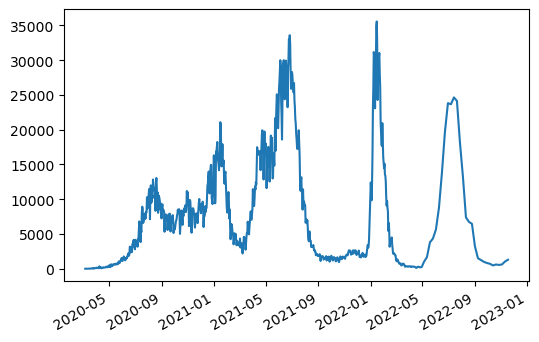

In [114]:
plt.figure(figsize=(6,4))
datos_ini.fecha_hoy_casos.value_counts().sort_index(ascending=True).plot()
plt.show()

In [115]:
datos_ini['Fecha_Not'] = pd.to_datetime(datos_ini['Fecha_Not'])
datos_ini['Fecha_Noti'] = datos_ini['Fecha_Not'].dt.date
datos_ini.Fecha_Not.value_counts().head(10)

2022-01-06    44424
2022-01-07    41706
2022-01-05    37292
2021-06-10    36880
2021-06-15    36602
2022-01-04    36434
2021-06-21    35200
2021-06-08    34362
2021-06-17    34133
2021-06-18    33537
Name: Fecha_Not, dtype: int64

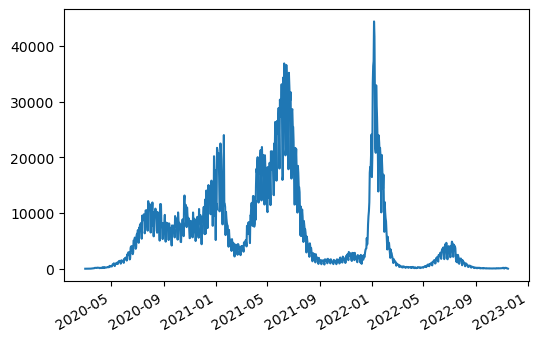

In [116]:
plt.figure(figsize=(6,4))
datos_ini.Fecha_Not.value_counts().sort_index(ascending=True).plot()
plt.show()

In [117]:
datos_ini['Fecha_inicio_sintomas'] = pd.to_datetime(datos_ini['Fecha_inicio_sintomas'])
datos_ini['Fecha_inicio_sintomasi'] = datos_ini['Fecha_inicio_sintomas'].dt.date
datos_ini.Fecha_inicio_sintomas.value_counts()

2022-01-03    41474
2022-01-04    36700
2022-01-02    32887
2021-06-15    30648
2021-12-31    30474
              ...  
2020-02-29        2
2020-02-28        2
2020-03-03        2
2022-11-15        2
2020-02-27        1
Name: Fecha_inicio_sintomas, Length: 993, dtype: int64

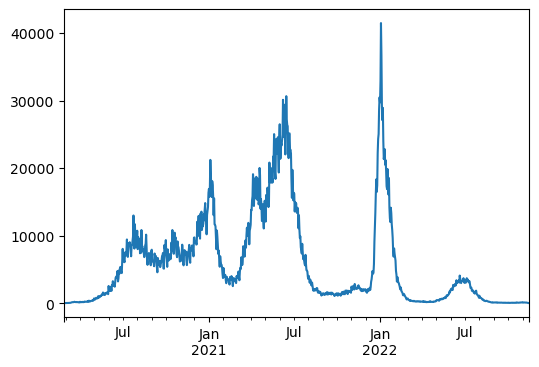

In [118]:
plt.figure(figsize=(6,4))
datos_ini.Fecha_inicio_sintomas.value_counts().sort_index(ascending=True).plot()
plt.show()

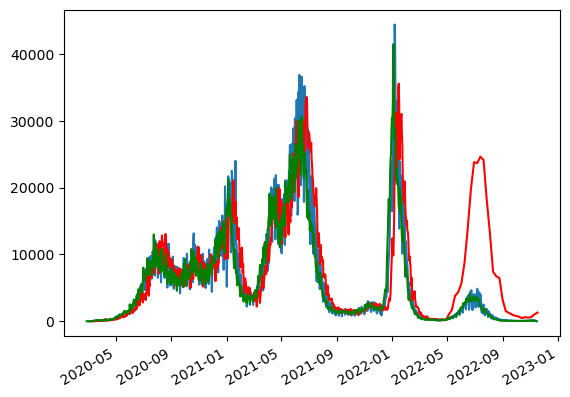

In [119]:
plt.figure()
datos_ini.Fecha_Not.value_counts().sort_index(ascending=True).plot()
datos_ini.fecha_hoy_casos.value_counts().sort_index(ascending=True).plot(color='red')
datos_ini.Fecha_inicio_sintomas.value_counts().sort_index(ascending=True).plot(color='green')

plt.show()

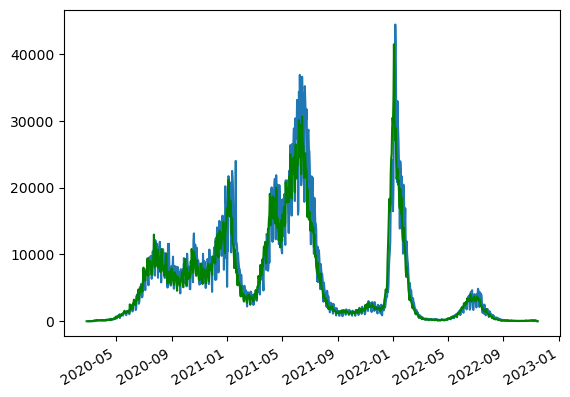

In [120]:
plt.figure()
datos_ini.Fecha_Not.value_counts().sort_index(ascending=True).plot()
datos_ini.Fecha_inicio_sintomas.value_counts().sort_index(ascending=True).plot(color='green')

plt.show()

In [121]:
datos_ini.Pais_viajo_1_nom.value_counts().head(10)

ESTADOS UNIDOS DE AMÉRICA    1413
MÉXICO                        385
ESPAÑA                        370
BRASIL                        285
VENEZUELA                     177
PANAMÁ                        126
ECUADOR                       126
REPÚBLICA DOMINICANA           98
CHILE                          68
EL SALVADOR                    57
Name: Pais_viajo_1_nom, dtype: int64

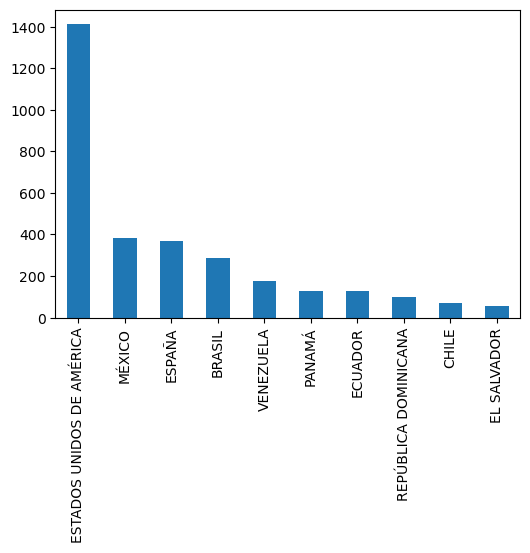

In [122]:
plt.figure(figsize=(6,4))
datos_ini.Pais_viajo_1_nom.value_counts().head(10).plot.bar()
plt.show()

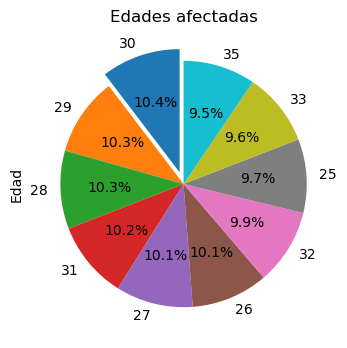

In [123]:
plt.figure(figsize=(6,4))
explode = (0.1,0,0,0,0,0,0,0,0,0)
datos_ini.Edad.value_counts().head(10).plot.pie(explode = explode, autopct='%1.1f%%', startangle=90).set_title("Edades afectadas")
plt.show()

In [124]:
datos_ini['Departamento_nom'] = datos_ini['Departamento_nom'].str.upper()
datos_ini.Departamento_nom = datos_ini.Departamento_nom.str.replace(' ', '')
datos_ini.Departamento_nom.value_counts().head(15)

BOGOTA            1855445
ANTIOQUIA          943966
VALLE              564150
CUNDINAMARCA       327856
SANTANDER          293509
BARRANQUILLA       276178
CARTAGENA          162845
ATLANTICO          140518
BOYACA             129336
TOLIMA             126906
NORTESANTANDER     124402
CORDOBA            122090
CALDAS             119336
RISARALDA          109497
CESAR              108961
Name: Departamento_nom, dtype: int64

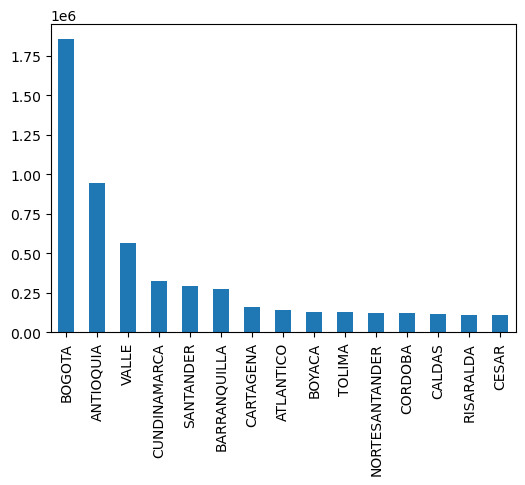

In [125]:
plt.figure(figsize=(6,4))
datos_ini.Departamento_nom.value_counts().head(15).plot.bar()
plt.show()

In [126]:
datos_ini['Ciudad_municipio_nom'] = datos_ini['Ciudad_municipio_nom'].str.upper()
datos_ini.Ciudad_municipio_nom = datos_ini.Ciudad_municipio_nom.str.replace(' ', '')
datos_ini.Ciudad_municipio_nom.value_counts().head(10)

BOGOTA          1855445
MEDELLIN         542830
CALI             400165
BARRANQUILLA     276178
CARTAGENA        162845
BUCARAMANGA      140770
IBAGUE            90925
SANTAMARTA        84503
MANIZALES         83931
CUCUTA            76559
Name: Ciudad_municipio_nom, dtype: int64

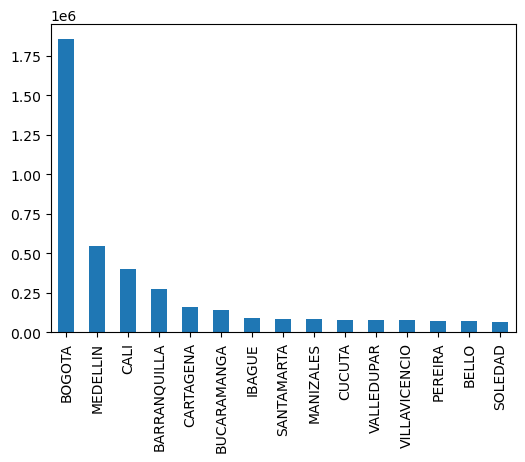

In [127]:
plt.figure(figsize=(6,4))
datos_ini.Ciudad_municipio_nom.value_counts().head(15).plot.bar()
plt.show()

In [128]:
datos_ini['Recuperado'] = datos_ini['Recuperado'].str.upper()
datos_ini.Recuperado = datos_ini.Recuperado.str.replace(' ', '')
datos_ini.Recuperado.value_counts()

RECUPERADO    6139728
FALLECIDO      141881
ACTIVO           1486
Name: Recuperado, dtype: int64

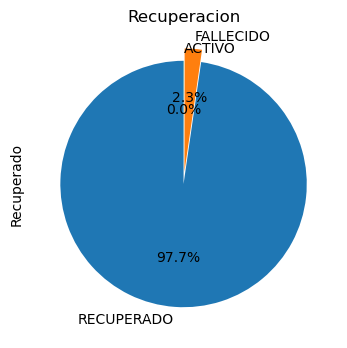

In [129]:
plt.figure(figsize=(6,4))
explode = (0,0.1,0)
datos_ini.Recuperado.value_counts().head(3).plot.pie(explode= explode, autopct='%1.1f%%', startangle=90).set_title("Recuperacion")
plt.show()

In [130]:
datos_ini['Sexo'] = datos_ini['Sexo'].str.upper()
datos_ini.Sexo = datos_ini.Sexo.str.replace(' ', '')
datos_ini.Sexo.value_counts()

F    3371382
M    2941275
Name: Sexo, dtype: int64

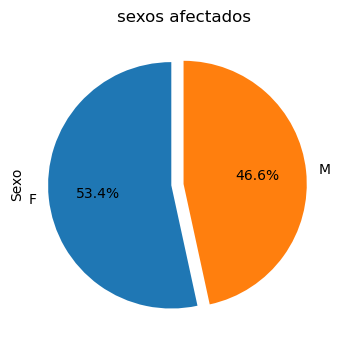

In [131]:
plt.figure(figsize=(6,4))
explode = (0.1,0)
datos_ini.Sexo.value_counts().plot.pie(explode= explode, autopct='%1.1f%%', startangle=90).set_title("sexos afectados")
plt.show()

In [132]:
datos_ini['Fuente_tipo_contagio'] = datos_ini['Fuente_tipo_contagio'].str.upper()
datos_ini.Fuente_tipo_contagio = datos_ini.Fuente_tipo_contagio.str.replace(' ', '')
datos_ini.Fuente_tipo_contagio.value_counts()

COMUNITARIA    4372285
RELACIONADO    1936674
IMPORTADO         3698
Name: Fuente_tipo_contagio, dtype: int64

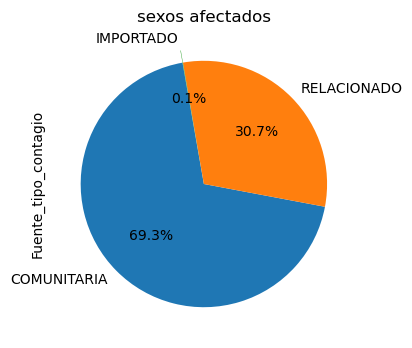

In [133]:
plt.figure(figsize=(6,4))
explode = (0,0,0.1)
datos_ini.Fuente_tipo_contagio.value_counts().plot.pie(explode= explode, autopct='%1.1f%%', startangle=100).set_title("sexos afectados")
plt.show()

In [134]:
datos_ini['Ubicacion'] = datos_ini['Ubicacion'].str.upper()
datos_ini.Ubicacion = datos_ini.Ubicacion.str.replace(' ', '')
datos_ini.Ubicacion.value_counts()

CASA           6136309
FALLECIDO       141881
HOSPITAL           198
HOSPITALUCI         19
Name: Ubicacion, dtype: int64

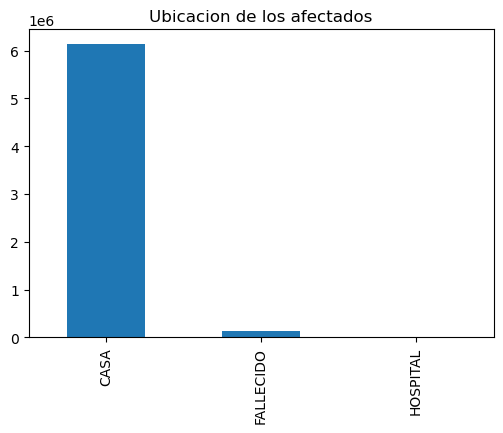

In [135]:
plt.figure(figsize=(6,4))
datos_ini.Ubicacion.value_counts().head(3).plot.bar().set_title("Ubicacion de los afectados")
plt.show()

---datos no categoricos---

In [136]:
datos_full.Edad.mean()

39.91193660609154

In [137]:
datos_full.Edad.std()

18.365886287052692